#**EDA on Air Quality Index (2015–2020)**

Importing dataset from kaggle

In [3]:
!pip install opendatasets

Importing libraries

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Loaded and previewed the dataset

In [5]:
data1 = pd.read_csv("/content/city_day.csv")

In [6]:
data1.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [7]:
data1.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


Information about Dataframe

In [8]:
data1.info()
data1.describe()
data1.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [9]:
data1.shape

(29531, 16)

In [10]:
type(data1)

pandas.core.frame.DataFrame

In [11]:
data1.isnull().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [12]:
data1.value_counts('AQI')

,count
AQI,
102.0,223
100.0,222
70.0,208
106.0,208
78.0,198
...,...
1314.0,1
1319.0,1
1842.0,1


 Distribution of PM2.5 Levels Across Years

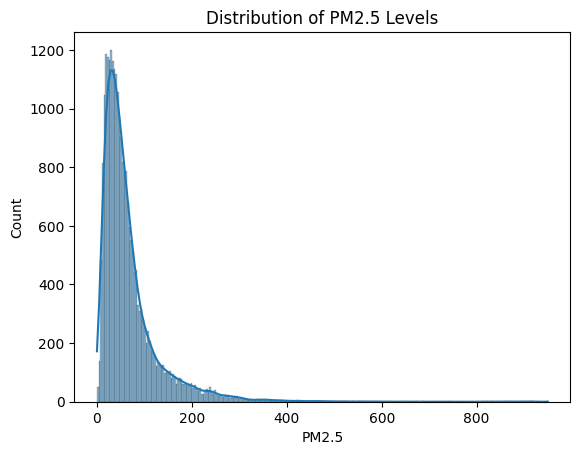

In [13]:
sns.histplot(data1['PM2.5'].dropna(), kde=True)
plt.title('Distribution of PM2.5 Levels')
plt.show()

PM2.5 & PM10 Trends – Delhi

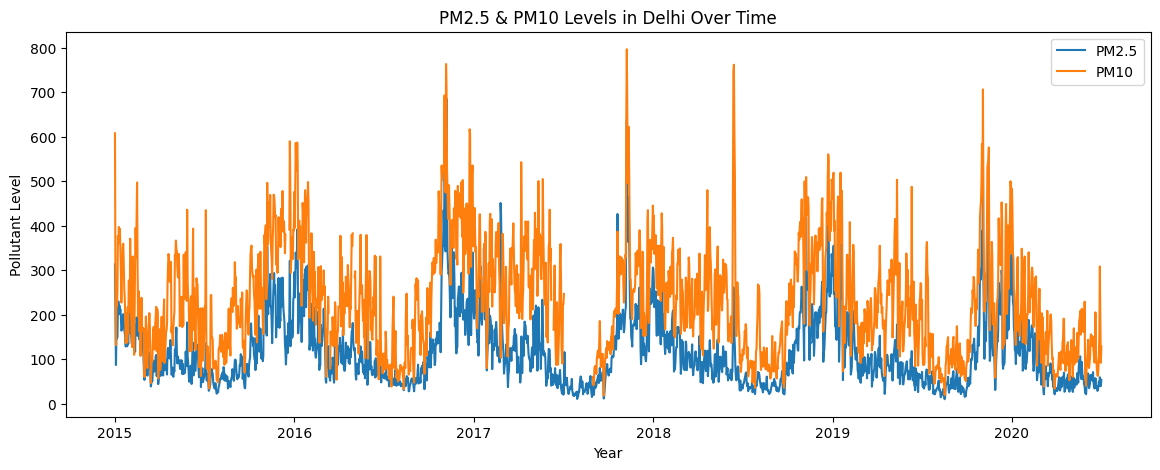

In [14]:
data1['Date'] = pd.to_datetime(data1['Date'])

# Filter for one city like Delhi
delhi = data1[data1['City'] == 'Delhi']

plt.figure(figsize=(14,5))
plt.plot(delhi['Date'], delhi['PM2.5'], label='PM2.5')
plt.plot(delhi['Date'], delhi['PM10'], label='PM10')
plt.legend()
plt.title("PM2.5 & PM10 Levels in Delhi Over Time")
plt.xlabel("Year")
plt.ylabel("Pollutant Level")
plt.show()


PM2.5 & PM10 Trends – Ahmedabad

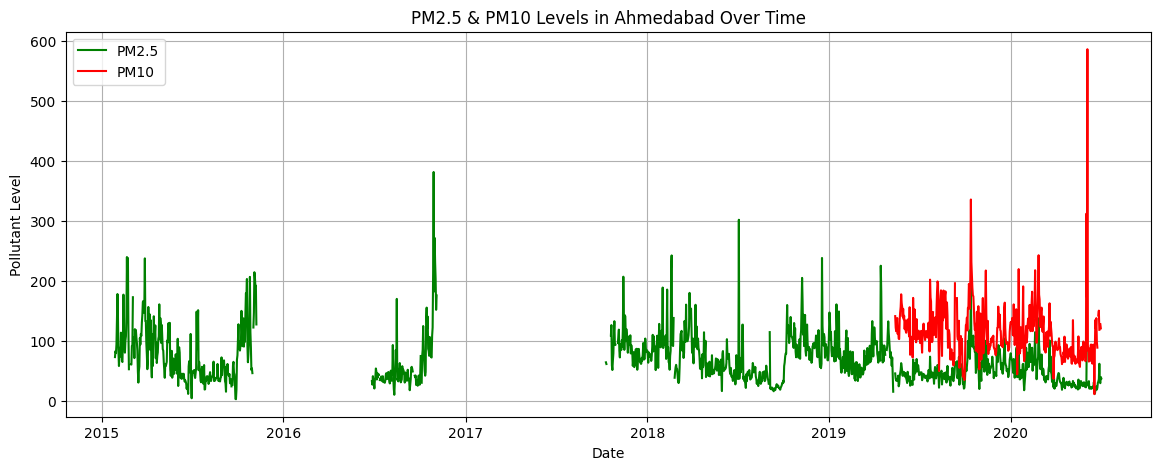

In [15]:
# Convert 'Date' column to datetime
data1['Date'] = pd.to_datetime(data1['Date'])

# Filter data for Ahmedabad
ahmedabad = data1[data1['City'] == 'Ahmedabad']

plt.figure(figsize=(14,5))
plt.plot(ahmedabad['Date'], ahmedabad['PM2.5'], label='PM2.5', color='green')
plt.plot(ahmedabad['Date'], ahmedabad['PM10'], label='PM10', color='red')
plt.legend()
plt.title("PM2.5 & PM10 Levels in Ahmedabad Over Time")
plt.xlabel("Date")
plt.ylabel("Pollutant Level")
plt.grid(True)
plt.show()


 Correlation & Relationships

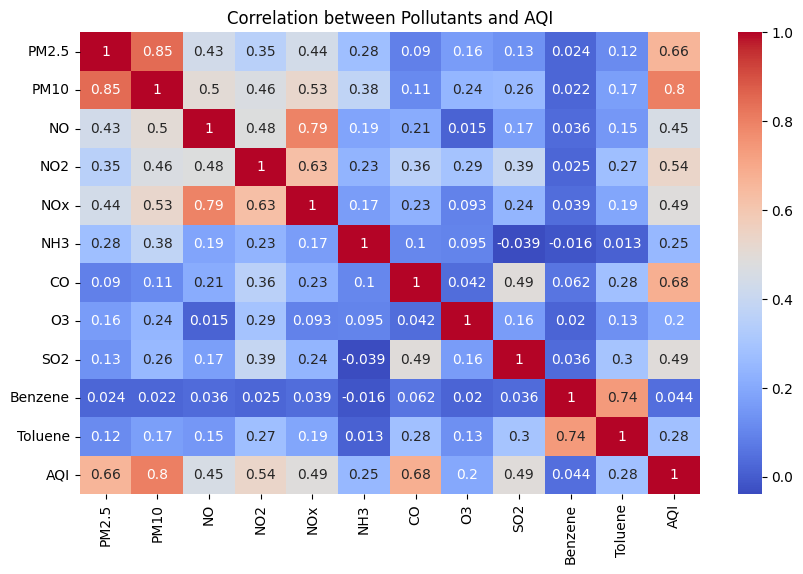

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(data1[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'O3', 'SO2', 'Benzene', 'Toluene', 'AQI']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Pollutants and AQI")
plt.show()


# Insight:
PM2.5 and PM10 are strongly positively correlated
# Observation:
* Delhi shows seasonal spikes in pollution around winter
  
* PM2.5 and PM10 have a strong positive correlation, meaning when one increases, the other usually does too.

* Other gases like NO2, SO2, and CO show moderate correlation with AQI, indicating that multiple pollutants contribute to poor air quality.

* Ozone (O3) seems less correlated in Ahmedabad compared to northern cities like Delhi, likely due to regional differences in pollutant sources and sunlight intensity.







AQI Over Time - Delhi

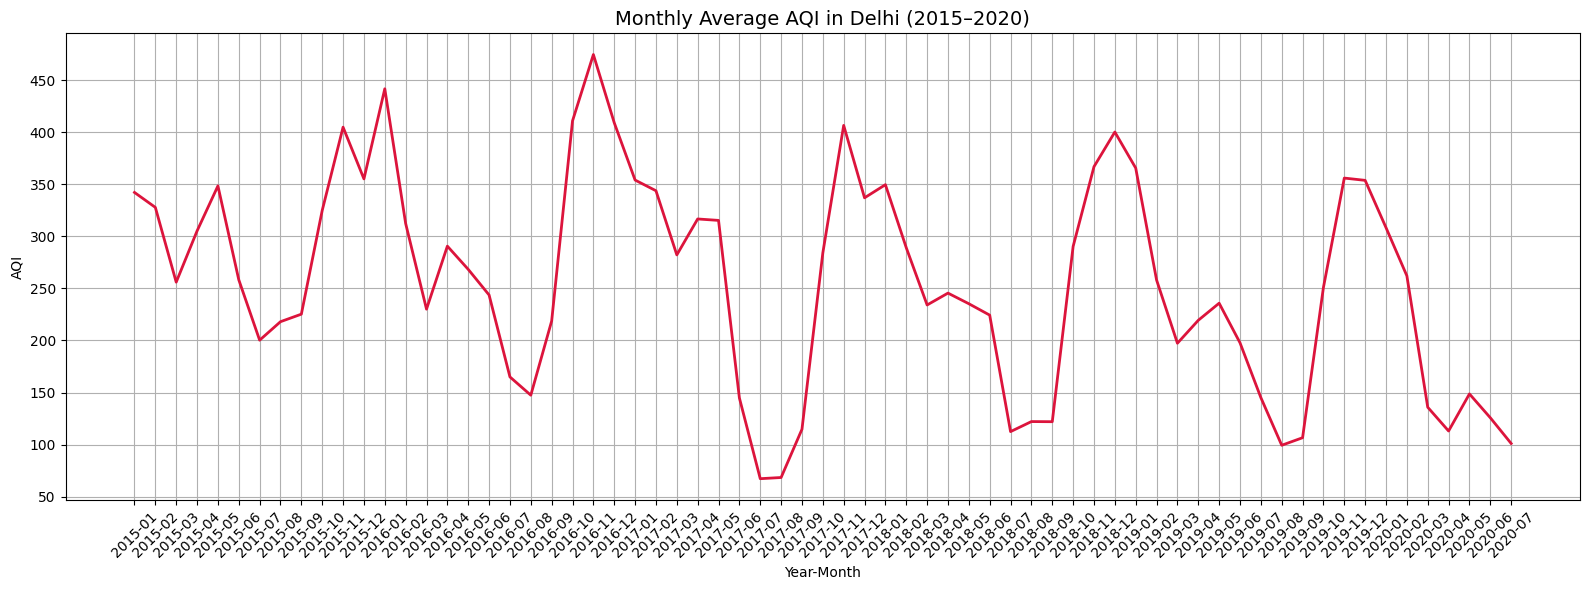

In [17]:
# Ensure Date column is in datetime format
data1['Date'] = pd.to_datetime(data1['Date'], errors='coerce')

# Filter for Delhi
delhi = data1[data1['City'] == 'Delhi'].copy()

# Drop missing AQI values
delhi = delhi.dropna(subset=['AQI'])

# Create Year-Month column
delhi['YearMonth'] = delhi['Date'].dt.to_period('M')

# Group by Year-Month and calculate average AQI
monthly_aqi_delhi = delhi.groupby('YearMonth')['AQI'].mean().reset_index()
monthly_aqi_delhi['YearMonth'] = monthly_aqi_delhi['YearMonth'].astype(str)

# Plotting
plt.figure(figsize=(16,6))
plt.plot(monthly_aqi_delhi['YearMonth'], monthly_aqi_delhi['AQI'], color='crimson', linewidth=2)

plt.title('Monthly Average AQI in Delhi (2015–2020)', fontsize=14)
plt.xlabel('Year-Month')
plt.ylabel('AQI')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Maximum Average AQI in Delhi

In [18]:
data1['Date'] = pd.to_datetime(data1['Date'], errors='coerce')
delhi = data1[data1['City'] == 'Delhi'].copy()
delhi = delhi.dropna(subset=['AQI'])
delhi['Year'] = delhi['Date'].dt.year
# Group by year and calculate average AQI
yearly_avg_aqi = delhi.groupby('Year')['AQI'].mean().reset_index()
max_aqi_year = yearly_avg_aqi.loc[yearly_avg_aqi['AQI'].idxmax()]
print("Year with maximum average AQI in Delhi:")
print(max_aqi_year)

Year with maximum average AQI in Delhi:
Year    2016.000000
AQI      301.369863
Name: 1, dtype: float64


Average yearly AQI in Delhi with bargraph

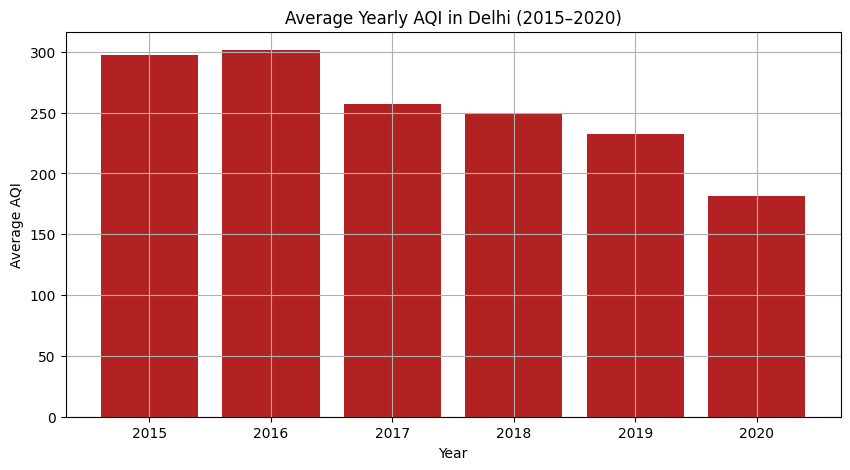

In [19]:
plt.figure(figsize=(10,5))
plt.bar(yearly_avg_aqi['Year'], yearly_avg_aqi['AQI'], color='firebrick')
plt.title("Average Yearly AQI in Delhi (2015–2020)")
plt.xlabel("Year")
plt.ylabel("Average AQI")
plt.grid(True)
plt.show()

Maximum Average AQI in Ahmedabad




In [20]:
data1['Date'] = pd.to_datetime(data1['Date'], errors='coerce')
ahmedabad = data1[data1['City'] == 'Ahmedabad'].copy()
ahmedabad = ahmedabad.dropna(subset=['AQI'])
ahmedabad['Year'] = ahmedabad['Date'].dt.year
# Group by year and calculate average AQI
yearly_avg_aqi = ahmedabad.groupby('Year')['AQI'].mean().reset_index()
max_aqi_year = yearly_avg_aqi.loc[yearly_avg_aqi['AQI'].idxmax()]
print("Year with maximum average AQI in Ahmedabad:")
print(max_aqi_year)

Year with maximum average AQI in Ahmedabad:
Year    2018.000000
AQI      622.263305
Name: 3, dtype: float64


Average yearly AQI in Ahmedabad with bargraph


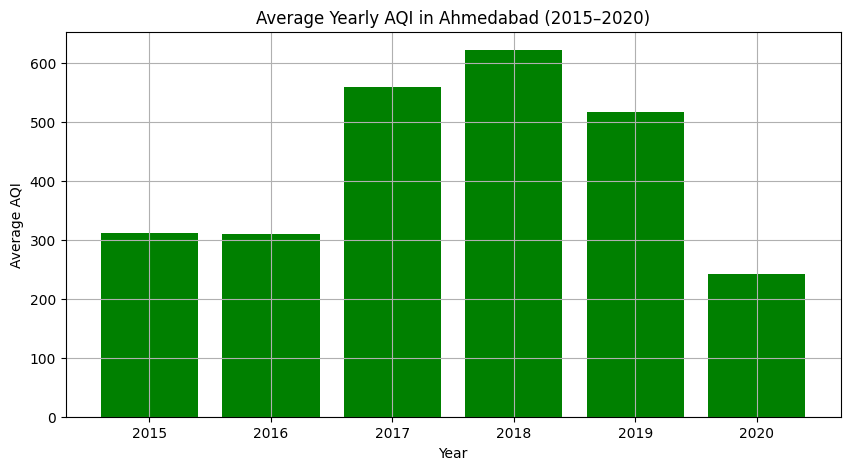

In [21]:
plt.figure(figsize=(10,5))
plt.bar(yearly_avg_aqi['Year'], yearly_avg_aqi['AQI'], color='green')
plt.title("Average Yearly AQI in Ahmedabad (2015–2020)")
plt.xlabel("Year")
plt.ylabel("Average AQI")
plt.grid(True)
plt.show()

#**INSIGHTS**

# Ahmedabad
The AQI in Ahmedabad fluctuated throughout the years, with visible spikes in winter months (November–January), mainly due to temperature inversion and increased pollution sources.

A notable drop in AQI during 2020 is observed, likely caused by the COVID-19 lockdown, which led to reduced vehicular and industrial emissions.

Despite seasonal variations, Ahmedabad's AQI mostly stayed in the "Moderate" to "Poor" category, suggesting consistent air quality concerns.

# Delhi
Delhi shows consistently higher AQI values compared to Ahmedabad, frequently reaching “Very Poor” or “Severe” levels during winters.

The worst air quality was observed in 2016, where the average AQI peaked across months.

Like Ahmedabad, Delhi also saw improved air quality in 2020, but overall remains in the "Poor to Very Poor" category due to factors like stubble burning, traffic, and urban density.

# Overall Observations
There’s a strong seasonal pattern in both cities with AQI worsening in winters and improving during the monsoon months.

Delhi’s AQI trend is more extreme, while Ahmedabad's AQI is relatively stable but still problematic.

The data underscores the urgent need for city-specific pollution control policies, especially during high-risk months.

Both cities showed a marked decline in PM levels during 2020, which aligns with national lockdown periods, indicating how human activity directly affects air pollution.